# Mochammad Rafii Nanda Wicaksana

# 09011281823053

Artificial Neural Network
Pada Assassinations Dataset

Sumber : https://www.kaggle.com/tmtdmr/ann-on-assassinations-dataset

Di kernel ini akan membandingkan algoritma Keras Classifier untuk berbagai nilai "Numbers of ANN", "CV" dan "epochs" dan menebak "jenis kelamin" orang yang meninggal karena pembunuhan.

CONTENT

1. Data Cleaning
2. Normalization
3. Train Test Split
4. Build to 2 Layer Neural Network
5. Build ANN from Keras for different hyperparameters
6. Conclusion

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
data = pd.read_csv("C:/Users/LENOVO/Documents/JUPYTER KECERDASAN BUATAN/Assassinations Dataset/master.csv",sep=",")

# 1. Data Cleaning

Menurunkan kolom nul dan non numerik

In [38]:
data.dropna(inplace=True)
data.drop(["age","country","country-year","generation"],axis=1,inplace=True)

Mengubah pria dan wanita menjadi 1 dan 0

In [39]:
data.sex = [1 if each == "male" else 0 for each in data.sex]

Menghapus jarak

In [40]:
# Menghapus jarak
data.rename(columns={' gdp_for_year ($) ':'gdp_year'}, inplace=True)
data.rename(columns={'HDI for year':'HDI_year'}, inplace=True)
data.rename(columns={'suicides/100k pop':'suicides/100k_pop'}, inplace=True)
data.rename(columns={'gdp_per_capita ($)':'gdp_per_capita_dollar'}, inplace=True)

Menghapus koma

In [41]:
data.gdp_year = data.gdp_year.str.replace(',','')

Mengidentifikasikan x dan y

In [42]:
y = data.sex
x_data = data.drop(["sex"],axis=1)

Konversi jenis kolom keenam dari string ke float

In [43]:
x_data.gdp_year = data.gdp_year.apply(lambda x: float(x))

# 2. Normalization

Proses normalisasi untuk memodifikasi nilai dalam varabel sehingga dapat mengukurnya dalam skala umum. Beberapa bentuk normalisasi yang paling umum bertujuan untuk mengubah nilai-nilai sehingga jumlahnya menjadi 1.

In [44]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

# 3. Train Test Split

Selanjutnya yaitu membagi data set menjadi data train dan data test

Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML. Kita memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri atau belajar pola dari data yang diberikan.

Test set adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.

Biasanya sebagai rule of thumb (aturan umum) proporsi test set sebesar 20% dan train set 80%. Namun ada juga yang menentukan 25:75, terserah yang mana.

Membagi data train dan test

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

x_train = x_train.values.T
x_test = x_test.values.T
y_test = y_test.values.reshape(1,y_test.shape[0])
y_train = y_train.values.reshape(1,y_train.shape[0])

Fungsi sigmoid

In [46]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

Menginisialisasi parameter dan ukuran lapisan

In [47]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

Forward propagation

forward propagation adalah proses dimana kita membawa data pada input melewati tiap neuron pada hidden layer sampai kepada output layer yang nanti akan dihitung errornya

In [48]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Compute cost

In [49]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

Backward propagation

Backpropagation adalah algoritma pembelajaran untuk memperkecil tingkat error dengan cara menyesuaikan bobotnya berdasarkan perbedaan output dan target yang diinginkan.

In [50]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

Update parameters

In [51]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

Prediksi

In [52]:
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# 4. Build to 2 Layer Neural Network

2 - Layer neural network

Cost after iteration 0: 0.349240
Cost after iteration 100: 0.348384
Cost after iteration 200: 0.347729
Cost after iteration 300: 0.347226
Cost after iteration 400: 0.346840
Cost after iteration 500: 0.346543
Cost after iteration 600: 0.346314
Cost after iteration 700: 0.346136
Cost after iteration 800: 0.345997
Cost after iteration 900: 0.345888
Cost after iteration 1000: 0.345801
Cost after iteration 1100: 0.345732
Cost after iteration 1200: 0.345675
Cost after iteration 1300: 0.345628
Cost after iteration 1400: 0.345588
Cost after iteration 1500: 0.345553
Cost after iteration 1600: 0.345522
Cost after iteration 1700: 0.345493
Cost after iteration 1800: 0.345467
Cost after iteration 1900: 0.345441
Cost after iteration 2000: 0.345417
Cost after iteration 2100: 0.345392
Cost after iteration 2200: 0.345368
Cost after iteration 2300: 0.345344
Cost after iteration 2400: 0.345318
Cost after iteration 2500: 0.345293
Cost after iteration 2600: 0.345267
Cost after iteration 2700: 0.345239
Cost

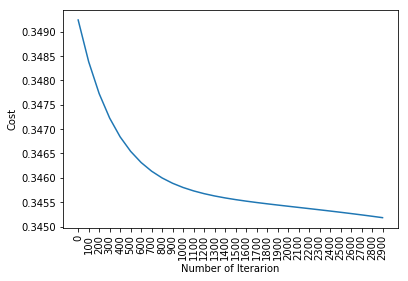

train accuracy: 59.136306090870725 %
test accuracy: 55.93625498007968 %


In [53]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
      
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))    
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=3000)

Setelah menggunakan 2 Layer Neural Network didapat hasil data train memiliki akurasi sebesar 59% dan data tes memiliki akurasi sebesar 55%.

Membentuk kembali

Ubah kembali data yang sudah di proses menjadi semula

In [54]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

# 5. Build ANN From Keras for Different Hyperparameters 

Mengevaluasi ANN

Menggunakan ANN untuk menentukan besar akurasi data train dan test

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library 
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1])) # we use dimension of x_train as input
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu')) # we use 4 nodes in first layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # if we use sigmoid function it means we add output layer
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # we will use accuracy as metrics
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100) # epochs means that is number of iteration 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/100
4739/4739 [==============================] - 0s 57us/step - loss: 0.6931 - accuracy: 0.5039
Epoch 2/100
4739/4739 [==============================] - 0s 30us/step - loss: 0.6870 - accuracy: 0.6202
Epoch 3/100
4739/4739 [==============================] - 0s 35us/step - loss: 0.6570 - accuracy: 0.7031
Epoch 4/100
4739/4739 [==============================] - 0s 42us/step - loss: 0.6126 - accuracy: 0.7253
Epoch 5/100
4739/4739 [==============================] - 0s 34us/step - loss: 0.5813 - accuracy: 0.7253
Epoch 6/100
4739/4739 [==============================] - 0s 40us/step - loss: 0.5636 - accuracy: 0.7324
Epoch 7/100
4739/4739 [==============================] - 0s 33us/step - loss: 0.5552 - accuracy: 0.7318
Epoch 8/100
4739/4739 [==============================] - 0s 33us/step - loss: 0.5509 - accuracy: 0.7329
Epoch 9/100
4739/4739 [==============================] - 0s 36us/step - loss: 0.5501 - accuracy: 0.7337
Epoch 10/100
4739/4739 [==============================] - 0s 31u

4739/4739 [==============================] - 0s 36us/step - loss: 0.5434 - accuracy: 0.7381
Epoch 80/100
4739/4739 [==============================] - 0s 30us/step - loss: 0.5439 - accuracy: 0.7371
Epoch 81/100
4739/4739 [==============================] - 0s 31us/step - loss: 0.5437 - accuracy: 0.7362
Epoch 82/100
4739/4739 [==============================] - 0s 33us/step - loss: 0.5435 - accuracy: 0.7400
Epoch 83/100
4739/4739 [==============================] - 0s 35us/step - loss: 0.5442 - accuracy: 0.7352
Epoch 84/100
4739/4739 [==============================] - 0s 40us/step - loss: 0.5442 - accuracy: 0.7348
Epoch 85/100
4739/4739 [==============================] - 0s 38us/step - loss: 0.5436 - accuracy: 0.7360
Epoch 86/100
4739/4739 [==============================] - 0s 37us/step - loss: 0.5435 - accuracy: 0.7371
Epoch 87/100
4739/4739 [==============================] - 0s 39us/step - loss: 0.5435 - accuracy: 0.7373
Epoch 88/100
4739/4739 [==============================] - 0s 31us/st

4739/4739 [==============================] - 0s 38us/step - loss: 0.5427 - accuracy: 0.7369
Epoch 57/100
4739/4739 [==============================] - 0s 37us/step - loss: 0.5420 - accuracy: 0.7375
Epoch 58/100
4739/4739 [==============================] - 0s 31us/step - loss: 0.5435 - accuracy: 0.7369
Epoch 59/100
4739/4739 [==============================] - 0s 34us/step - loss: 0.5421 - accuracy: 0.7362
Epoch 60/100
4739/4739 [==============================] - 0s 31us/step - loss: 0.5425 - accuracy: 0.7352
Epoch 61/100
4739/4739 [==============================] - 0s 37us/step - loss: 0.5421 - accuracy: 0.7364
Epoch 62/100
4739/4739 [==============================] - 0s 36us/step - loss: 0.5422 - accuracy: 0.7373
Epoch 63/100
4739/4739 [==============================] - 0s 38us/step - loss: 0.5427 - accuracy: 0.7354
Epoch 64/100
4739/4739 [==============================] - 0s 38us/step - loss: 0.5421 - accuracy: 0.7360
Epoch 65/100
4739/4739 [==============================] - 0s 32us/st

4740/4740 [==============================] - 0s 35us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 34/100
4740/4740 [==============================] - 0s 33us/step - loss: 0.6930 - accuracy: 0.5078
Epoch 35/100
4740/4740 [==============================] - 0s 37us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 36/100
4740/4740 [==============================] - 0s 35us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 37/100
4740/4740 [==============================] - 0s 33us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 38/100
4740/4740 [==============================] - 0s 41us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 39/100
4740/4740 [==============================] - 0s 39us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 40/100
4740/4740 [==============================] - 0s 36us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 41/100
4740/4740 [==============================] - 0s 32us/step - loss: 0.6931 - accuracy: 0.5078
Epoch 42/100
4740/4740 [==============================] - 0s 32us/st

In [56]:
dict_of_values = {'ANN_Num': [], 'CV': [],'epochs': [] , 'accuracy': [] }
data_temproray = pd.DataFrame.from_dict(dict_of_values)

In [57]:
data_temproray.ANN_Num = [2]
data_temproray.CV = [3]
data_temproray.epochs = [100]
data_temproray.accuracy = [0.6558003964712986]

In [58]:
data_temproray.head()

,ANN_Num,CV,epochs,accuracy
0,2,3,100,0.6558


In [59]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library 
from keras.layers import Dense # build our layers library
def build_classifier2():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1])) # we use dimension of x_train as input
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu')) # we use 4 nodes in second layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # if we use sigmoid function it means we add output layer
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # we will use accuracy as metrics
    return classifier

classifier = KerasClassifier(build_fn = build_classifier2, epochs = 150) # epochs means that is number of iteration 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 4)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/150
5331/5331 [==============================] - 0s 46us/step - loss: 0.6930 - accuracy: 0.5059
Epoch 2/150
5331/5331 [==============================] - 0s 30us/step - loss: 0.6852 - accuracy: 0.6211
Epoch 3/150
5331/5331 [==============================] - 0s 33us/step - loss: 0.6475 - accuracy: 0.6907
Epoch 4/150
5331/5331 [==============================] - 0s 32us/step - loss: 0.5988 - accuracy: 0.7201
Epoch 5/150
5331/5331 [==============================] - 0s 31us/step - loss: 0.5706 - accuracy: 0.7239
Epoch 6/150
5331/5331 [==============================] - 0s 29us/step - loss: 0.5589 - accuracy: 0.7301
Epoch 7/150
5331/5331 [==============================] - 0s 32us/step - loss: 0.5553 - accuracy: 0.7306
Epoch 8/150
5331/5331 [==============================] - 0s 36us/step - loss: 0.5527 - accuracy: 0.7299
Epoch 9/150
5331/5331 [==============================] - 0s 32us/step - loss: 0.5516 - accuracy: 0.7329
Epoch 10/150
5331/5331 [==============================] - 0s 35u

5331/5331 [==============================] - 0s 32us/step - loss: 0.5438 - accuracy: 0.7316
Epoch 80/150
5331/5331 [==============================] - 0s 32us/step - loss: 0.5438 - accuracy: 0.7314
Epoch 81/150
5331/5331 [==============================] - 0s 34us/step - loss: 0.5434 - accuracy: 0.7316
Epoch 82/150
5331/5331 [==============================] - 0s 31us/step - loss: 0.5436 - accuracy: 0.7334
Epoch 83/150
5331/5331 [==============================] - 0s 35us/step - loss: 0.5435 - accuracy: 0.7340
Epoch 84/150
5331/5331 [==============================] - 0s 30us/step - loss: 0.5431 - accuracy: 0.7351
Epoch 85/150
5331/5331 [==============================] - 0s 34us/step - loss: 0.5429 - accuracy: 0.7338
Epoch 86/150
5331/5331 [==============================] - 0s 32us/step - loss: 0.5428 - accuracy: 0.7353
Epoch 87/150
5331/5331 [==============================] - 0s 35us/step - loss: 0.5431 - accuracy: 0.7333
Epoch 88/150
5331/5331 [==============================] - 0s 31us/st

5332/5332 [==============================] - 0s 34us/step - loss: 0.6288 - accuracy: 0.7086
Epoch 7/150
5332/5332 [==============================] - 0s 33us/step - loss: 0.6168 - accuracy: 0.7191
Epoch 8/150
5332/5332 [==============================] - 0s 36us/step - loss: 0.6069 - accuracy: 0.7243
Epoch 9/150
5332/5332 [==============================] - 0s 36us/step - loss: 0.5993 - accuracy: 0.7284
Epoch 10/150
5332/5332 [==============================] - 0s 37us/step - loss: 0.5920 - accuracy: 0.7356
Epoch 11/150
5332/5332 [==============================] - 0s 39us/step - loss: 0.5858 - accuracy: 0.7356
Epoch 12/150
5332/5332 [==============================] - 0s 33us/step - loss: 0.5814 - accuracy: 0.7341
Epoch 13/150
5332/5332 [==============================] - 0s 42us/step - loss: 0.5772 - accuracy: 0.7346
Epoch 14/150
5332/5332 [==============================] - 0s 36us/step - loss: 0.5744 - accuracy: 0.7344
Epoch 15/150
5332/5332 [==============================] - 0s 45us/step 

5332/5332 [==============================] - 0s 37us/step - loss: 0.5436 - accuracy: 0.7365
Epoch 85/150
5332/5332 [==============================] - 0s 36us/step - loss: 0.5436 - accuracy: 0.7369
Epoch 86/150
5332/5332 [==============================] - 0s 34us/step - loss: 0.5435 - accuracy: 0.7352
Epoch 87/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5435 - accuracy: 0.7374
Epoch 88/150
5332/5332 [==============================] - 0s 33us/step - loss: 0.5433 - accuracy: 0.7376
Epoch 89/150
5332/5332 [==============================] - 0s 37us/step - loss: 0.5426 - accuracy: 0.7376
Epoch 90/150
5332/5332 [==============================] - 0s 41us/step - loss: 0.5431 - accuracy: 0.7365
Epoch 91/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5428 - accuracy: 0.7341
Epoch 92/150
5332/5332 [==============================] - 0s 38us/step - loss: 0.5426 - accuracy: 0.7380
Epoch 93/150
5332/5332 [==============================] - 0s 36us/st

5332/5332 [==============================] - 0s 30us/step - loss: 0.6932 - accuracy: 0.4934
Epoch 12/150
5332/5332 [==============================] - 0s 32us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 13/150
5332/5332 [==============================] - 0s 28us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 14/150
5332/5332 [==============================] - 0s 29us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 15/150
5332/5332 [==============================] - 0s 34us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 16/150
5332/5332 [==============================] - 0s 31us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 17/150
5332/5332 [==============================] - 0s 31us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 18/150
5332/5332 [==============================] - 0s 31us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 19/150
5332/5332 [==============================] - 0s 28us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 20/150
5332/5332 [==============================] - 0s 28us/st

5332/5332 [==============================] - 0s 34us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 90/150
5332/5332 [==============================] - 0s 28us/step - loss: 0.6932 - accuracy: 0.4916
Epoch 91/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 92/150
5332/5332 [==============================] - 0s 27us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 93/150
5332/5332 [==============================] - 0s 29us/step - loss: 0.6932 - accuracy: 0.4961
Epoch 94/150
5332/5332 [==============================] - 0s 33us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 95/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 96/150
5332/5332 [==============================] - 0s 31us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 97/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.6932 - accuracy: 0.5024
Epoch 98/150
5332/5332 [==============================] - 0s 36us/st

5332/5332 [==============================] - 0s 32us/step - loss: 0.5510 - accuracy: 0.7260
Epoch 17/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5511 - accuracy: 0.7284
Epoch 18/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5506 - accuracy: 0.7260
Epoch 19/150
5332/5332 [==============================] - 0s 32us/step - loss: 0.5504 - accuracy: 0.7269
Epoch 20/150
5332/5332 [==============================] - 0s 39us/step - loss: 0.5502 - accuracy: 0.7245
Epoch 21/150
5332/5332 [==============================] - 0s 38us/step - loss: 0.5499 - accuracy: 0.7267
Epoch 22/150
5332/5332 [==============================] - 0s 36us/step - loss: 0.5497 - accuracy: 0.7264
Epoch 23/150
5332/5332 [==============================] - 0s 32us/step - loss: 0.5495 - accuracy: 0.7269
Epoch 24/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5493 - accuracy: 0.7262
Epoch 25/150
5332/5332 [==============================] - 0s 32us/st

5332/5332 [==============================] - 0s 33us/step - loss: 0.5459 - accuracy: 0.7267
Epoch 95/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5461 - accuracy: 0.7256
Epoch 96/150
5332/5332 [==============================] - 0s 31us/step - loss: 0.5457 - accuracy: 0.7260
Epoch 97/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5456 - accuracy: 0.7228
Epoch 98/150
5332/5332 [==============================] - 0s 35us/step - loss: 0.5461 - accuracy: 0.7249
Epoch 99/150
5332/5332 [==============================] - 0s 28us/step - loss: 0.5466 - accuracy: 0.7286
Epoch 100/150
5332/5332 [==============================] - 0s 30us/step - loss: 0.5464 - accuracy: 0.7254
Epoch 101/150
5332/5332 [==============================] - 0s 36us/step - loss: 0.5453 - accuracy: 0.7271
Epoch 102/150
5332/5332 [==============================] - 0s 32us/step - loss: 0.5457 - accuracy: 0.7264
Epoch 103/150
5332/5332 [==============================] - 0s 29u

In [60]:
data_temproray.loc[-1] = [2, 4, 150,  0.6640782611279521]  # adding a row
data_temproray.index = data_temproray.index + 1  # shifting index
data_temproray = data_temproray.sort_index()  # sorting by index

data_temproray.loc[-1] = [3, 3, 100, 0.492614638565769]  # adding a row
data_temproray.index = data_temproray.index + 1  # shifting index
data_temproray = data_temproray.sort_index()  # sorting by index

data_temproray.loc[-1] = [3, 4, 150, 0.49022363005586056]  # adding a row
data_temproray.index = data_temproray.index + 1  # shifting index
data_temproray = data_temproray.sort_index()  # sorting by index

data_temproray.loc[-1] = [2, 4, 150, 0.7318890200427076]  # adding a row
data_temproray.index = data_temproray.index + 1  # shifting index
data_temproray = data_temproray.sort_index()  # sorting by index

data_temproray.loc[-1] = [2, 5, 150, 0.7341438597594337]  # adding a row
data_temproray.index = data_temproray.index + 1  # shifting index
data_temproray = data_temproray.sort_index()  # sorting by index

data_temproray.loc[-1] = [2, 4, 200, 0.7310445842269522]  # adding a row
data_temproray.index = data_temproray.index + 1  # shifting index
data_temproray = data_temproray.sort_index()  # sorting by index

In [61]:
data_temproray

,ANN_Num,CV,epochs,accuracy
0,2.0,4.0,200.0,0.731045
1,2.0,5.0,150.0,0.734144
2,2.0,4.0,150.0,0.731889
3,3.0,4.0,150.0,0.490224
4,3.0,3.0,100.0,0.492615
5,2.0,4.0,150.0,0.664078
6,2.0,3.0,100.0,0.655800


In [62]:
data_temproray.accuracy = data_temproray.accuracy.apply(lambda x: x*100)

In [63]:
data_temproray

,ANN_Num,CV,epochs,accuracy
0,2.0,4.0,200.0,73.104458
1,2.0,5.0,150.0,73.414386
2,2.0,4.0,150.0,73.188902
3,3.0,4.0,150.0,49.022363
4,3.0,3.0,100.0,49.261464
5,2.0,4.0,150.0,66.407826
6,2.0,3.0,100.0,65.580040


Import plotly.plotly as py

In [64]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


international_color = [float(each) for each in data_temproray.epochs]
data2 = [
    {
        'y':data_temproray.CV,
        'x': data_temproray.ANN_Num,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': data_temproray.accuracy,
            'showscale': True
        },
        "text" :  data_temproray.accuracy    
    }
]
iplot(data2)

Kesimpulan

Hasil terbaik dari model ini adalah 73,41% berkat "Layer of Network" yang dikenal sebagai ANN_num = 2, CV = 5, epochs = 150